# Customer Segmentation


In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn to make statistic graphs

## Details about Data set

In [6]:
# importing data set
df = pd.read_csv("Customer_Details_and_Preferences.csv")
df.head()

,Gender,Age,Style,Type,Size,Mechanics,Protection,Strap,Water Resistance,Features,Bought(for $),Spending Score(1-100),Income(Family in k$)
0,Male,22,Sports,Both in one,32mm - 36 mm ( for medium wrists),Quartz ( Battery powered - highest accuracy- f...,Acrylic glass (type of plastic - prone to scra...,Nato,5 BAR / 5 ATM / 50m / 165ft (withstand splash...,Date,31,48,48
1,Male,29,Sports,Analog,32mm - 36 mm ( for medium wrists),Quartz ( Battery powered - highest accuracy- f...,Acrylic glass (type of plastic - prone to scra...,Rubber or Silicon,20 BAR / 20 ATM / 200m / 660ft (suitable for ...,Backlight,36,44,43
2,Male,18,Field,Digital,26mm - 30mm (for small wrists),Mechanical (manually wound ),Acrylic glass (type of plastic - prone to scra...,Leather,5 BAR / 5 ATM / 50m / 165ft (withstand splash...,Backlight,47,52,51
3,Female,20,Formal,Both in one,38mm - 40mm (Standard),Mechanical (manually wound ),Acrylic glass (type of plastic - prone to scra...,Rubber or Silicon,5 BAR / 5 ATM / 50m / 165ft (withstand splash...,Date,22,58,49
4,Male,26,Sports,Both in one,38mm - 40mm (Standard),Quartz ( Battery powered - highest accuracy- f...,Acrylic glass (type of plastic - prone to scra...,Nato,10 BAR / 10 ATM / 100m / 330f (suitable for s...,Date,20,53,51


In [7]:
df.shape

(37647, 13)

In [8]:
df.describe()

,Age,Bought(for $),Spending Score(1-100),Income(Family in k$)
count,37647.000000,37647.000000,37647.000000,37647.000000
mean,40.481207,50.790236,48.790661,42.822589
std,18.783980,36.842027,17.177577,20.088791
min,10.000000,1.000000,5.000000,1.000000
25%,25.000000,22.000000,40.000000,28.000000
50%,36.000000,44.000000,49.000000,39.000000
75%,54.000000,73.000000,58.000000,55.000000
max,85.000000,200.000000,93.000000,100.000000


### Density Graphs

C:\Users\lafri\AppData\Local\Temp\ipykernel_13096\1923584557.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
e:\Apps Uni\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lafri\AppData\Local\Temp\ipykernel_13096\1923584557.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility)

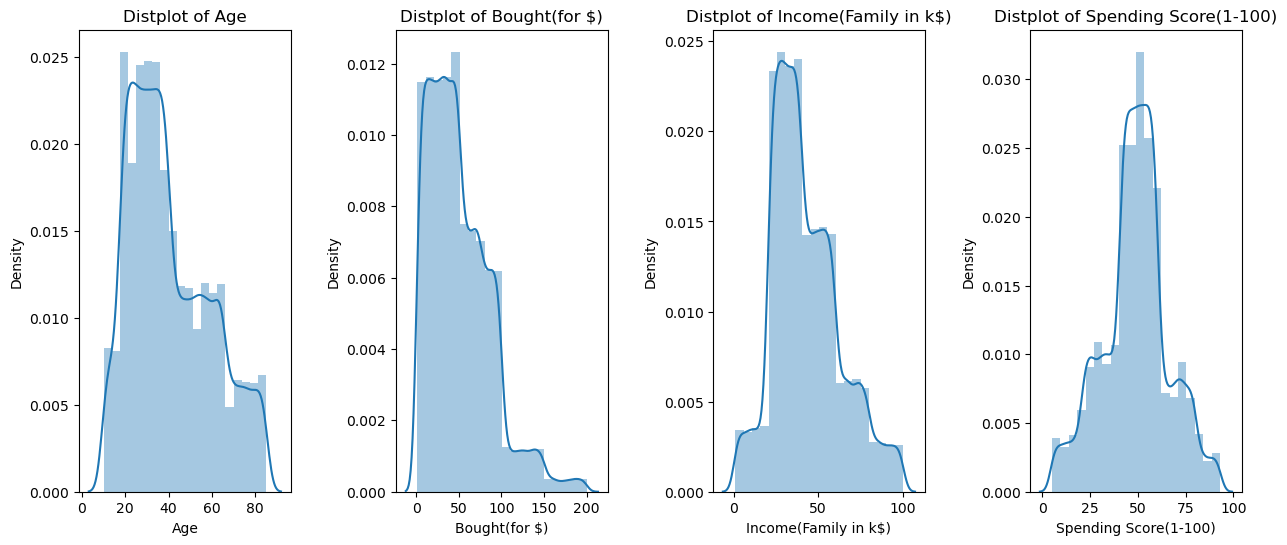

In [9]:
# Density graphs
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age', 'Bought(for $)', 'Income(Family in k$)', 'Spending Score(1-100)']:
    n += 1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title("Distplot of {}".format(x))
plt.show()

### Peaks of each Graphs

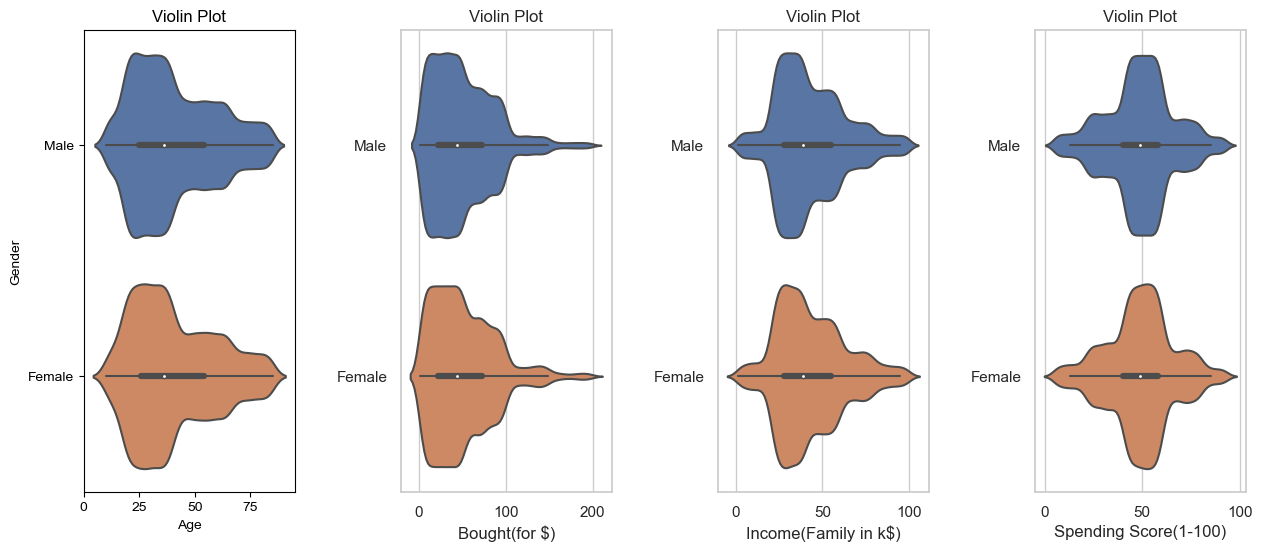

In [10]:
# taking the peaks of the data 
plt.figure(1,figsize=(15,6))
n=0
for cols in ['Age', 'Bought(for $)', 'Income(Family in k$)', 'Spending Score(1-100)']:
    n += 1
    plt.subplot(1,4,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y='Gender', data=df)
    plt.ylabel('Gender' if n == 1 else ' ')
    plt.title("Violin Plot")
plt.show()